<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-4-Model-Validation/blob/master/LS_DS_242_Validate_classification_problems_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Model Validation_ 

# Validate classification problems

Objectives
- Classification Metrics: Precision, Recall, F1, ROC AUC
- Confusion Matrix
- Imbalanced Classes


Reading
- [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)

## Preliminary setup

#### Install [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
- Google Colab: `pip install category_encoders`
- Local, Anaconda: `conda install -c conda-forge category_encoders`

#### Install  [mlxtend](http://rasbt.github.io/mlxtend/) to plot decision regions
- Google Colab: Already installed
- Local, Anaconda: `conda install -c conda-forge mlxtend`

#### Get the Bank Marketing dataset from Kaggle ...
- Download from the [Kaggle competition page](https://www.kaggle.com/c/ds2-model-validation/data)
- Or use the Kaggle API

#### ... or from GitHub
- Clone the [repo](https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/tree/master/module-1-begin-modeling-process/bank-marketing)
- Or download from the repo:

In [1]:
# Installing csv files for bank marketing data
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/test_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/sample_submission.csv

--2019-03-05 20:15:55--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3833210 (3.7M) [text/plain]
Saving to: ‘train_features.csv.1’

train_features.csv. 100%[===================>]   3.66M  --.-KB/s    in 0.06s   

2019-03-05 20:15:55 (59.0 MB/s) - ‘train_features.csv.1’ saved [3833210/3833210]

--2019-03-05 20:15:56--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.gi

In [2]:
# Installing encoder from sklearn contrib
!pip install category_encoders

# Classification Metrics & Confusion Matrix — with Bank Marketing dataset

In [0]:
# (Code from the previous notebook) -- doing it all in one cell for quick reference

# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load data
X_train = pd.read_csv('train_features.csv').drop(columns='id')
X_test  = pd.read_csv('test_features.csv').drop(columns='id')
y_train = pd.read_csv('train_labels.csv')['y']
sample_submission = pd.read_csv('sample_submission.csv')

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

#### scikit-learn documentation
- [sklearn.linear_model.LogisticRegression.predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)
- [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:, 1]

In [10]:
y_pred_proba

array([0.0733274 , 0.04161109, 0.04878777, ..., 0.05844843, 0.10222659,
       0.04213551])

In [11]:
cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.1s finished


array([0.77295183, 0.78574708, 0.78036636, 0.79742952, 0.79020263,
       0.79837252, 0.79259604, 0.80331817, 0.77434981, 0.78202959])

In [14]:
roc_auc_score(y_train, y_pred_proba)

0.7868824318368706

In [18]:
np.mean([0.77295183, 0.78574708, 0.78036636, 0.79742952, 0.79020263,
       0.79837252, 0.79259604, 0.80331817, 0.77434981, 0.78202959])

0.787736355

#### Change the threshold and re-run this cell

In [19]:
threshold = 0.5
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred)) # Printing classification report

# Putting conf matrix in a dataframe
pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     27411
           1       0.65      0.23      0.34      3480

   micro avg       0.90      0.90      0.90     30891
   macro avg       0.78      0.61      0.64     30891
weighted avg       0.88      0.90      0.88     30891



,Predicted Negative,Predicted Positive
Actual Negative,26990,421
Actual Positive,2690,790


In [21]:
# Making variables from confustion matrix above
true_negative  = 26990
false_positive = 421
false_negative = 2690
true_positive  = 790

accuracy = ((true_negative + true_positive) / 
            (true_negative + false_positive + false_negative + true_positive))

actual_negative = true_negative + false_positive
actual_positive = false_negative + true_positive

predicted_negative = true_negative + false_negative
predicted_positive = false_positive + true_positive

precision = true_positive / predicted_positive
recall = true_positive / actual_positive
f1 = 2 * (precision*recall) / (precision+recall) 
print('Precision:', precision, 'Recall:', recall, 'F1:', f1)

Precision: 0.652353426919901 Recall: 0.22701149425287356 F1: 0.3368151780004264


#### ROC Curve
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

Area under the Receiver Operating Characteristic curve: 0.7868824318368706


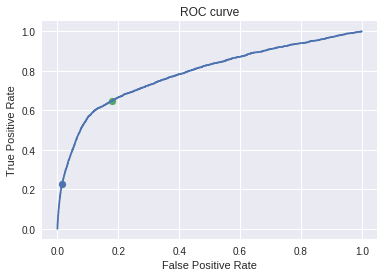

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))

# When the threshold = 0.5
false_positive = 421
true_positive = 790
false_positive_rate = false_positive/actual_negative
true_positive_rate = true_positive/actual_positive
plt.scatter(false_positive_rate, true_positive_rate);

# When the threshold = 0.1
false_positive = 4946
true_positive = 2250
false_positive_rate = false_positive/actual_negative
true_positive_rate = true_positive/actual_positive
plt.scatter(false_positive_rate, true_positive_rate);

# Imbalanced Classes — with synthetic data

## Fun demo!

The next code cell does five things:

#### 1. Generate data

We use scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate fake data for a binary classification problem, based on several parameters, including:
- Number of samples
- Weights, meaning "the proportions of samples assigned to each class."
- Class separation: "Larger values spread out the clusters/classes and make the classification task easier."

(We are generating fake data so it is easy to visualize.)

#### 2. Split data

We split the data three ways, into train, validation, and test sets. (For this toy example, it's not really necessary to do a three-way split. A two-way split, or even no split, would be ok. But I'm trying to demonstrate good habits, even in toy examples, to avoid confusion.)

#### 3. Fit model

We use scikit-learn to fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the training data.

We use this model parameter:

> **class_weight : _dict or ‘balanced’, default: None_**

> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.

> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.


#### 4. Evaluate model

We use our Logistic Regression model, which was fit on the training data, to generate predictions for the validation data.

Then we print [scikit-learn's Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), with many metrics, and also the accuracy score. We are comparing the correct labels to the Logistic Regression's predicted labels, for the validation set. 

#### 5. Visualize decision function

Based on these examples
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-1-decision-regions-in-2d

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


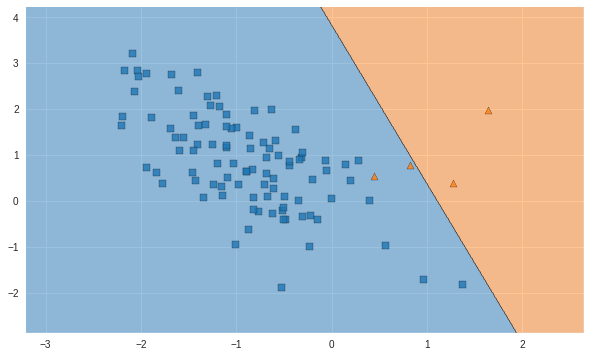

In [0]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

Try re-running the cell above with different values for these four parameters:
- `n_samples`
- `weights`
- `class_sep`
- `class_balance`

For example, with a 50% / 50% class distribution:
```
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8
class_balance = None
```

With a 95% / 5% class distribution:
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = None
```

With the same 95% / 5% class distribution, but changing the Logistic Regression's `class_balance` parameter to `'balanced'` (instead of its default `None`)
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = 'balanced'
```

With the same 95% / 5% class distribution, but with different values for `class_balance`:
- `{0: 1, 1: 1}` _(equivalent to `None`)_
- `{0: 1, 1: 2}`
- `{0: 1, 1: 10}` _(roughly equivalent to `'balanced'` for this dataset)_
- `{0: 1, 1: 100}`
- `{0: 1, 1: 10000}`

How do the evaluation metrics and decision region plots change?

## What you can do about imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.


#### We demonstrated two of these options: 

- "Adjust the class weight (misclassification costs)" — many scikit-learn classifiers have a `class_balance` parameter
- "Adjust the decision threshold" — you can lean more about this in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

#### Another option to be aware of:
- The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."

# ASSIGNMENT

#### Bank Marketing
- Make another submission on Kaggle.
- Try "Cross-Validation + Independent Test Set" instead of "Train/Validate/Test Split."
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try using less features. You can look at multicollinearity. 
- Try the `class_weight` parameter.

#### Imbalanced Classes demo with synthetic data
- Play around with the demo. Change parameter values.
- Be able to calculate precision, recall, F1, and accuracy "by hand", given a confusion matrix and access to Wikipedia.

# STRETCH
- Read the blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415). You can replicate the code as-is,  ["the hard way"](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit). Or you can apply it to the Bank Marketing dataset.
- Try the [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library.
- Try other [scikit-learn classifiers](https://scikit-learn.org/stable/supervised_learning.html), beyond Logistic Regression.

In [0]:
# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
# Load data
X_train = pd.read_csv('train_features.csv').drop(columns='id')
X_test  = pd.read_csv('test_features.csv').drop(columns='id')
y_train = pd.read_csv('train_labels.csv')['y']
sample_submission = pd.read_csv('sample_submission.csv')

In [0]:
# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegressionCV(cv=5, n_jobs=-1)
)

In [89]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [0]:
# Listing features so I can come back a feature engineer

X_train = X_train[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
            'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']]

X_test = X_test[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
            'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']]

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, use_cat_names=True, verbose=0)), ('standardscale...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [0]:
y_pred_proba = pipeline.predict_proba(X_train)[:, 1]

In [0]:
# y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=5, n_jobs=-1, 
#                                  method='predict_proba')[:, 1]

In [93]:
y_pred_proba

array([0.07485034, 0.04516934, 0.0497509 , ..., 0.059818  , 0.10170945,
       0.04206414])

In [94]:
threshold = 0.5
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred)) # Printing classification report

# Putting conf matrix in a dataframe
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
cm

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     27411
           1       0.66      0.23      0.34      3480

   micro avg       0.90      0.90      0.90     30891
   macro avg       0.78      0.61      0.64     30891
weighted avg       0.88      0.90      0.88     30891



,Predicted Negative,Predicted Positive
Actual Negative,26991,420
Actual Positive,2679,801


In [95]:
# Making variables from confustion matrix above
true_negative  = cm.iloc[0][0]
false_positive = cm.iloc[0][1]
false_negative = cm.iloc[1][0]
true_positive  = cm.iloc[1][1]

accuracy = ((true_negative + true_positive) / 
            (true_negative + false_positive + false_negative + true_positive))

actual_negative = true_negative + false_positive
actual_positive = false_negative + true_positive

predicted_negative = true_negative + false_negative
predicted_positive = false_positive + true_positive

precision = true_positive / predicted_positive
recall = true_positive / actual_positive
f1 = 2 * (precision*recall) / (precision+recall) 
print('Precision:', precision, 'Recall:', recall, 'F1:', f1)

Precision: 0.6560196560196561 Recall: 0.23017241379310344 F1: 0.34077855775366944


In [96]:
cm.iloc[1][1]

801

Area under the Receiver Operating Characteristic curve: 0.7913087213917394


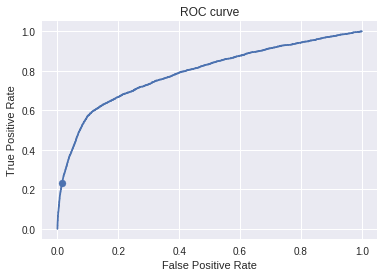

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))

# When the threshold = 0.5
false_positive_rate = false_positive/actual_negative
true_positive_rate = true_positive/actual_positive
plt.scatter(false_positive_rate, true_positive_rate);

In [0]:
# Creating submission

submission = sample_submission.copy()
submission['y'] = pipeline.predict_proba(X_test)[:, 1]
submission.to_csv('submission-002.csv', index=False)